## Simple Linear Regression

#### Building a linear regression model to predict sales using an appropriate predictor variable.

Basic Steps:
1. Reading and understanding the data
2. Training the model
3. Residual Analysis
4. Predicting the values and evaluating the model

### Step 1. Reading and understanding the data

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [61]:
df = pd.read_csv('advertising.csv')

In [62]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [63]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [65]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


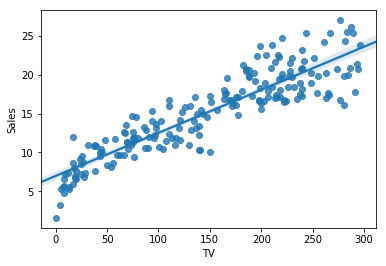

In [66]:
# Visualize the dataset

sns.regplot(x='TV',y='Sales',data=df)

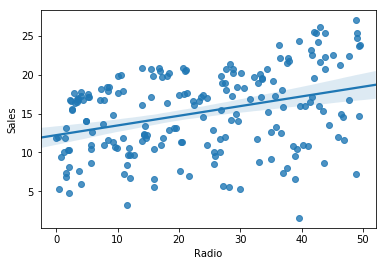

In [67]:
sns.regplot(x='Radio',y='Sales',data=df)

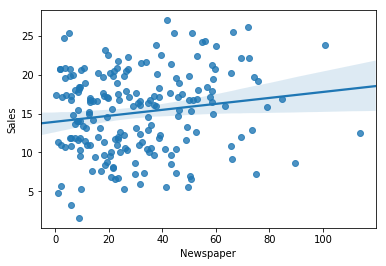

In [68]:
sns.regplot(x='Newspaper',y='Sales',data=df)

### Based on the above regression plots(using regplot from seaborn) we can see that a linear regression model will only be effective in TV vs Sales

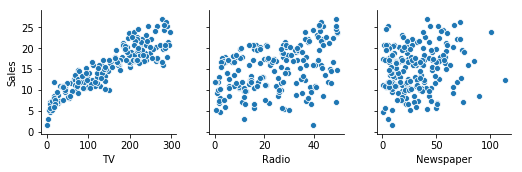

In [69]:
### To plot all the graphs of predictor vs target(output) variables simultaneously

sns.pairplot(data=df,
           x_vars=['TV','Radio','Newspaper'],
           y_vars='Sales')

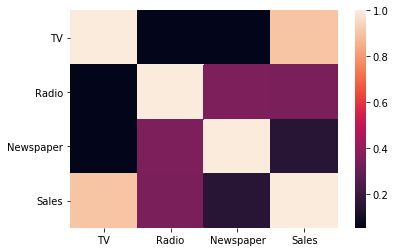

In [70]:
## Plot Heatmap

sns.heatmap(df.corr())

### Shows high positive correlation b/w TV and Sales, low correlation b/w Radio and Sales, and very less in Newspaper and Sales

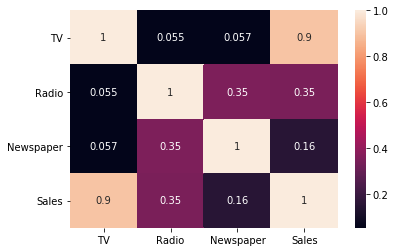

In [71]:
sns.heatmap(df.corr(), annot = True) ## Annot=true basically writes the corr values on the plot  

### Performing Simple Linear Regression


y = c + m1x1 + m2x2 + .... + mnxn

<li>y is the response</li>
<li>c is the intercept</li>
<li>m1 is the coefficient of the first feature</li>
<li>mn is the coefficient of the nth feature</li>

#### In Our Case:

y = c + m1 * TV

m here are called the model coefficients or model parameters

Steps:
- Create X and Y
- Create train and test datasets (Ratio used is mostly 70-30 or 80-20)
- Train your model on the training set (learning the coefficients)
- Evaluate Model (Train set and then test set)

##### These steps are applicable for all models and not just SLR

### Step 2. Training the Model

In [72]:
# Create X and Y ----- Convention X is caps ['For Predictor variables could be multiple'] and y is smaller case only one variable
X = df['TV']
y = df['Sales']

In [73]:
# Train test Split 70-30 or 80-20 split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [75]:
# Training the model

### Adding the constant explicitly because the statsmodel doesn't include the constant in its model

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

# y = c + mx
# y = c.const + m1*TV ->>>>>> This is what the model is going to learn

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [76]:
## Fitting the model ----> Ordinary Least Squares

lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [77]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           1.52e-52
Time:                        23:50:35   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R- Squared value = 0.816 or (81% of variance is actually explained by variance TV, Very High - Good Sign) - Also Correlation is not equal to causation.
Means the line is a best fit and is significant
and there is a correlation of sales with TV

Prob F Statistic is actually the P value - Shows the model statistic is significant. Not purely by chance.
Prob F Statistic is low => means that the fit is not by chance.


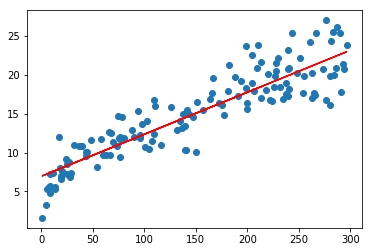

In [78]:
plt.scatter(X_train,y_train)
plt.plot(X_train, 6.948 + X_train*0.054, 'r')
plt.show()

### Residual Analysis

We will plot the residuals.
^^Assumption is that these residuals should be normaly distributed

### Step 3. Residual Analysis

In [80]:
#error = f(y_train, y_train_predicted) error is the function of these two variables 
# y_train_pred = 6.948 + X_train*0.054 ///////// But another way is mentioned below

y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
127    11.323253
81     20.028755
88     11.765073
119     8.006871
110    19.265114
57     14.377815
44      8.317782
148     9.021422
160    16.357826
89     12.937807
146    20.045118
199    19.608752
10     10.554157
20     18.861476
165    19.739662
12      8.246872
16     10.646885
101    23.116044
120    14.655998
45     16.499645
142    18.976022
117    11.115979
184    20.792395
187    17.372377
183    22.636042
         ...    
129    10.199610
159    14.132359
132     7.406868
108     7.663233
155     7.172321
130     6.986865
86     11.110524
93     20.634213
137    21.877856
144    12.195985
58     18.446928
60      9.866881
107    11.879619
143    12.654169
198    22.417859
34     12.168712
14     18.081471
66      8.666874
53     16.908738
98     22.750588
180    15.490548
94     12.806897
138     9.294151
176    20.497848
79     13.275991
87     12.986898
103    17.197830
67     14.5469

In [81]:
res = y_train - y_train_pred

Text(0.5,1,'Residual Plot')

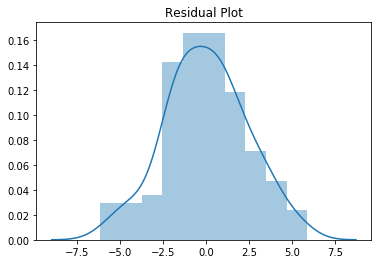

In [82]:
# Plot the residuals

plt.figure()
sns.distplot(res)
plt.title("Residual Plot")

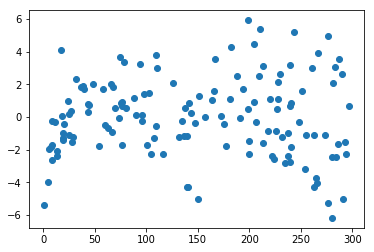

In [84]:
# Looking for patterns in residuals (We should not be able to identify)

plt.scatter(X_train,res)
plt.show()

# We can say that the model is significant or a good fit because there is no identifiable pattern
#in the plot below, meaning that the residuals are normally distributed. 
# We can also see that the mean is 0 and in the above plot distplot we can see that the mean is 0.


### Step 4: Predicting the values. and evaluating the model on the test set.

In [86]:
# Predictions on the test set(y_test_pred)
# Evaluate using R-Squared and other tests

X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

In [88]:
# Evaluate the method using R-Squared
# R-Squared

r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [89]:
# R-square is 79% on test data

r1 = r2_score(y_true=y_train,y_pred=y_train_pred)
r1

# R-Square is 81% on training data
# In general anything around 5% is good enough to make it a good fit.

0.8157933136480389

In [90]:
# Mean Squared Error on Test Data

m2 = mean_squared_error(y_true=y_test,y_pred=y_test_pred)
m2

4.077556371826956

In [91]:
# Mean Squared Error on Test Data

m1 = mean_squared_error(y_true=y_train,y_pred=y_train_pred)
m1

5.752400386486836

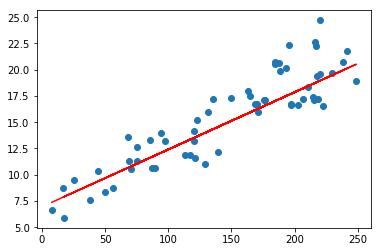

In [92]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()